###   Importing Libraries, Reading files & checking details

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('loan.csv')

In [4]:
df.shape

(39717, 111)

In [5]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [6]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


##  Data Cleaning 

###  Treating missing values

In [7]:
(df.isnull().sum()/len(df)).sort_values(ascending = False)

verification_status_joint    1.0
annual_inc_joint             1.0
mo_sin_old_rev_tl_op         1.0
mo_sin_old_il_acct           1.0
bc_util                      1.0
                            ... 
delinq_amnt                  0.0
policy_code                  0.0
earliest_cr_line             0.0
delinq_2yrs                  0.0
id                           0.0
Length: 111, dtype: float64

#### Dropping columns which has more than 50% missing values

In [8]:
df_drop = df.columns[(df.isnull().sum()/len(df)) >= 0.5]

In [9]:
df_drop

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [10]:
df.drop(columns = df_drop, inplace = True)

####  Imputing cells with <50% missing values
pub_rec_bankruptcies, title - missing values filled with unknown. 
emp_length - missing values filled with 0

In [11]:
df.emp_length.fillna('0',inplace = True)

In [12]:
df.title.fillna('Unknown',inplace = True)

In [13]:
df.pub_rec_bankruptcies.fillna('Unknown', inplace = True)

####  Columns (chargeoff_within_12_mths, collections_12_mths_ex_med, tax_liens) have value 0 & so dropping columns. 

In [14]:
df.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [15]:
df.drop('chargeoff_within_12_mths',inplace = True, axis = 1)

In [16]:
df.collections_12_mths_ex_med.value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [17]:
df.drop('collections_12_mths_ex_med',inplace = True, axis = 1)

In [18]:
df.tax_liens.value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [19]:
df.drop('tax_liens',inplace = True, axis = 1)

In [20]:
df.drop(['acc_now_delinq','delinq_amnt'],inplace = True, axis = 1)

In [21]:
df.drop('initial_list_status', inplace = True, axis = 1)

####  Removing Columns which will not be used in analysis (Desc, url, Emp_Title)

In [22]:
df.drop(['desc','url','emp_title','member_id', 'id','pymnt_plan','policy_code','application_type','zip_code'],inplace = True, axis = 1)

In [23]:
df.shape

(39717, 39)

### Fixing data types and outliers

#### Interest rate column is fixed to int

In [24]:
df.int_rate = df.int_rate.apply(lambda x: float(x[:-1]))

#### Annual_inc is modified to easily read the data and we have outliers in upper lmit impacting the data. So the outliers in upper range is replaced with Q3 + 1.5*IQR

In [25]:
df.annual_inc_K = df.annual_inc/1000

In [26]:
df.annual_inc_K.describe()

count    39717.000000
mean        68.968926
std         63.793766
min          4.000000
25%         40.404000
50%         59.000000
75%         82.300000
max       6000.000000
Name: annual_inc, dtype: float64

In [27]:
Q1,Q3 = np.percentile(df.annual_inc,[25,75])
IQR = Q3 -Q1
upper_limit = Q3 + (1.5*IQR)

In [28]:
df.annual_inc = np.where(df.annual_inc > upper_limit,upper_limit,df.annual_inc)

#### Revolving balance has outliers in upper lmit impacting the data. So the outliers in upper range is replaced with Q3 + 1.5*IQR

In [29]:
df.revol_bal.describe()

count     39717.000000
mean      13382.528086
std       15885.016641
min           0.000000
25%        3703.000000
50%        8850.000000
75%       17058.000000
max      149588.000000
Name: revol_bal, dtype: float64

In [30]:
Q1,Q3 = np.percentile(df.revol_bal,[25,75])
IQR = Q3 -Q1
upper_limit = Q3 + (1.5*IQR)

In [31]:
df.revol_bal = np.where(df.revol_bal > upper_limit,upper_limit,df.revol_bal)

#### Extracting no of years from emp_length

In [32]:
df.emp_length = df.emp_length.str.extract('(\d+)')

In [33]:
df.emp_length = df.emp_length.apply(pd.to_numeric)

#### Extracting month & year from issue_d

In [34]:
df.issue_month,df.issue_year = df.issue_d.str.split('-').str

In [35]:
df.issue_year = '20' + df.issue_year

#### Removing % from revol_util

In [36]:
df.revol_util = df.revol_util.str.rstrip('%')

In [37]:
df.revol_util = df.revol_util.apply(pd.to_numeric)

#### Extracting month & year from earliest_cr_line

In [38]:
df.earliest_cr_line_month = df.earliest_cr_line.apply(lambda x: x[0:3])
df.earliest_cr_line_year = df.earliest_cr_line.apply(lambda x: str(x[4:]))

In [39]:
df.shape

(39717, 39)

### Univariate analysis

####  Loan Amount ranges from 500 to 35000.  Most of loans amounts are rounded off in multiples of 5000. Loan amount requested & funded are mostly aligned.

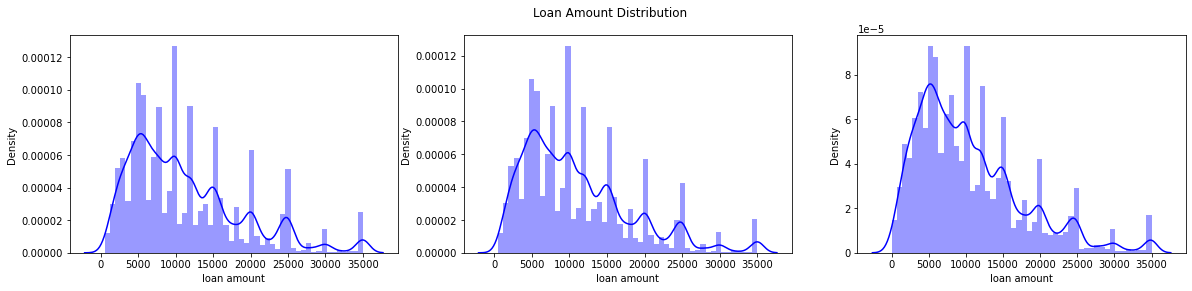

In [40]:
fig, axes = plt.subplots(1,3, sharex = True, figsize = (20,4))
fig.suptitle('Loan Amount Distribution')
plt.subplot(1,3,1)
sns.distplot(df.loan_amnt, color = "b")
plt.xlabel("loan amount")
plt.subplot(1,3,2)
sns.distplot(df.funded_amnt, color = "b")
plt.xlabel("loan amount")
plt.subplot(1,3,3)
sns.distplot(df.funded_amnt_inv, color = "b")
plt.xlabel("loan amount")
plt.show()

#### Majority of loans have Interest rate in the range of 9% to 15%

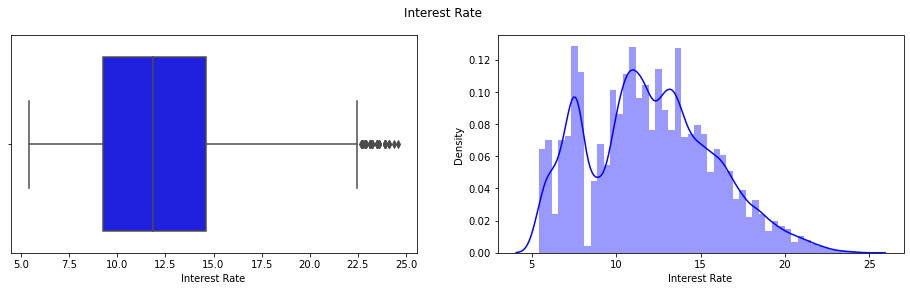

In [41]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
fig.suptitle('Interest Rate')
plt.subplot(1,2,1)
sns.boxplot(x = df.int_rate, color = 'b')
plt.xlabel("Interest Rate")
plt.subplot(1,2,2)
sns.distplot(df.int_rate, color = "b")
plt.xlabel("Interest Rate")
plt.show()

#### Major loan applicants are in grades B, A & C

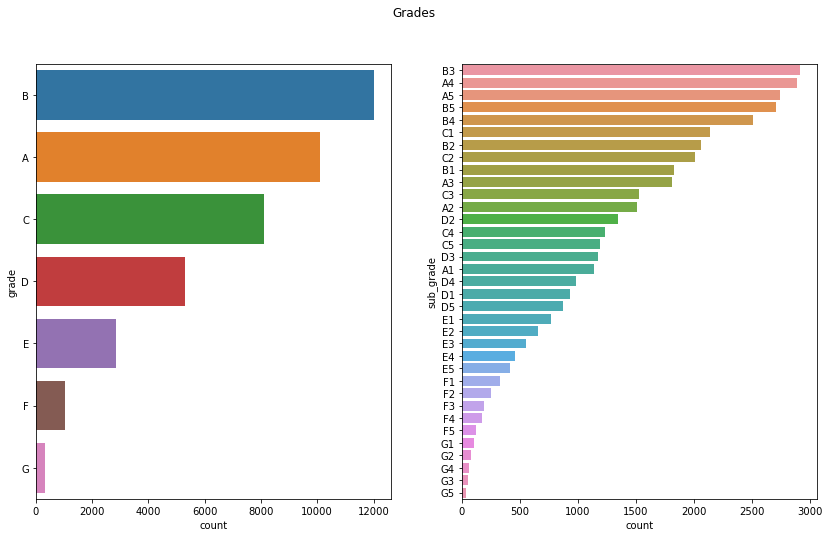

In [42]:
fig, axes = plt.subplots(1,2, figsize = (14,8))
fig.suptitle('Grades')
plt.subplot(1,2,1)
sns.countplot(y = 'grade', data = df, order = df.grade.value_counts().index)
plt.subplot(1,2,2)
sns.countplot(y = 'sub_grade', data = df, order = df.sub_grade.value_counts().index)
plt.show()

####  Top pupose of loan application is for debt consolidation & majority of people who apply for loan have 10+ years of employment tenure & stays on Rent or has mortgage

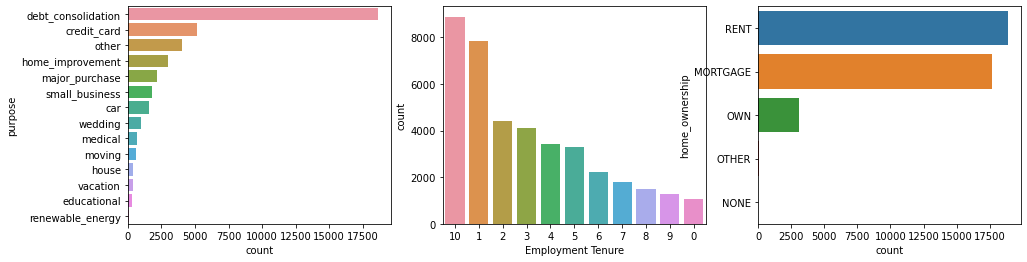

In [43]:
fig, axes = plt.subplots(1,3, figsize = (16,4))
plt.subplot(1,3,2)
sns.countplot(x='emp_length', data = df, order = df.emp_length.value_counts().index)
plt.xlabel("Employment Tenure")
plt.subplot(1,3,1)
sns.countplot(y= 'purpose', data = df, order = df.purpose.value_counts().index)
plt.subplot(1,3,3)
sns.countplot(y= 'home_ownership', data = df, order = df.home_ownership.value_counts().index)
plt.show()

#### Annual income is in range 40K to 80K &  Debt to Income ratio is on range of 8 to 19

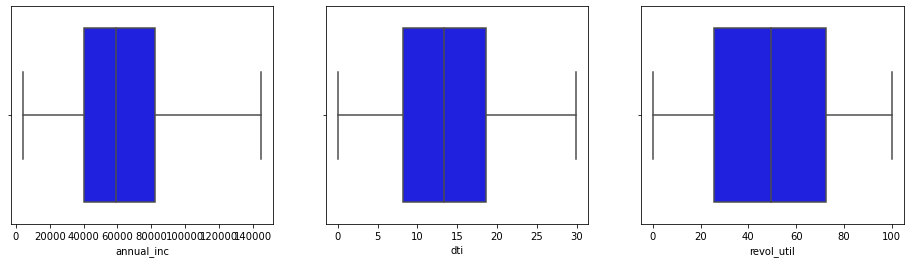

In [44]:
fig, axes = plt.subplots(1,3, figsize = (16,4))
plt.subplot(1,3,1)
sns.boxplot(df.annual_inc, color = 'b')
plt.subplot(1,3,2)
sns.boxplot(df.dti, color = 'b')
plt.subplot(1,3,3)
sns.boxplot(df.revol_util, color = 'b')
plt.show()

#### 14% of loans are charged off (defaulted).  The income is verified for major of loan applications. Delinqency in past 2 years is mostly nil.

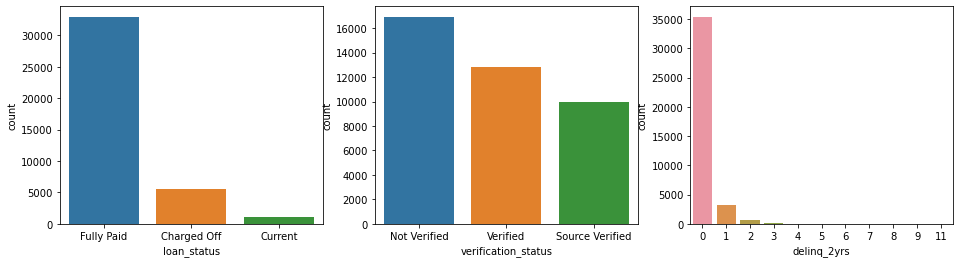

In [45]:
fig, axes = plt.subplots(1,3, figsize = (16,4))
plt.subplot(1,3,3)
sns.countplot(x='delinq_2yrs', data = df, order = df.delinq_2yrs.value_counts().index)
plt.subplot(1,3,1)
sns.countplot(x='loan_status', data = df, order = df.loan_status.value_counts().index)
plt.subplot(1,3,2)
sns.countplot(x='verification_status', data = df, order = df.verification_status.value_counts().index)
plt.show()

In [46]:
df.loan_status.value_counts()*100/len(df.loan_status)

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

#### Number of public recors on bankruptcies is mostly zero and doesnt provide much information on charge offs

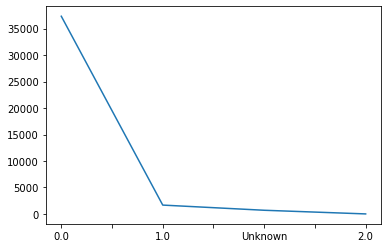

In [47]:
df.pub_rec_bankruptcies.value_counts().plot().bar
plt.show()

## Bivariate Analysis

#### Employment tenure has no major impact on the status of the loan

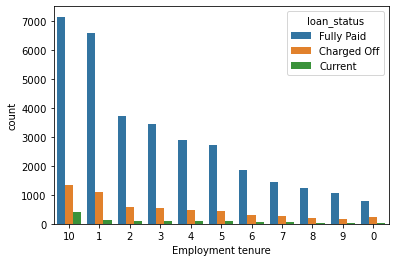

In [48]:
sns.countplot(x ='emp_length', hue = 'loan_status', data = df, order = df.emp_length.value_counts().index)
plt.xlabel("Employment tenure")
plt.show()

#### Loans which are defaulted have higher interest rate (11% - 16%) compared to the loans that are fully paid (8% - 14%)
#### Interest rate is lowest for A grade and it increases in order of B < C < D < E < F < G

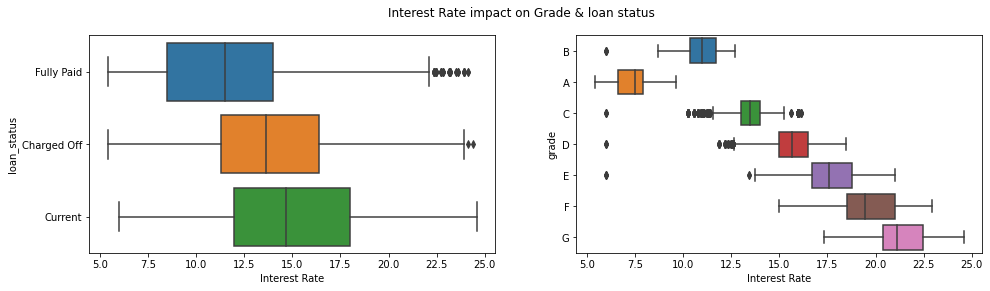

In [49]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
plt.suptitle('Interest Rate impact on Grade & loan status')
plt.subplot(1,2,1)
sns.boxplot(x = 'int_rate', y = 'loan_status', data = df)
plt.xlabel("Interest Rate")
plt.subplot(1,2,2)
sns.boxplot(x = 'int_rate', y = 'grade', data = df, order = df.grade.value_counts().index)
plt.xlabel("Interest Rate")
plt.show()

In [50]:
df_chargeoff = df[df.loan_status == "Charged Off"]

#### People who are in rent or mortgage have defaulted their loans in higher % compared to the people who own the house

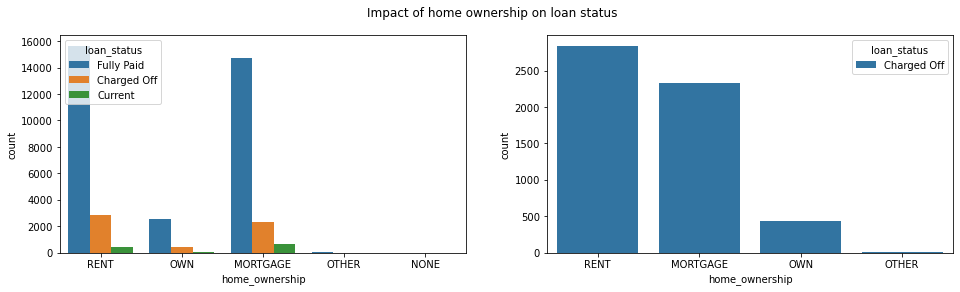

In [51]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
fig.suptitle('Impact of home ownership on loan status')
plt.subplot(1,2,1)
sns.countplot(x ='home_ownership', hue = 'loan_status', data = df)
plt.subplot(1,2,2)
sns.countplot(x ='home_ownership', hue = 'loan_status', data = df_chargeoff,order = df_chargeoff.home_ownership.value_counts().index)
plt.show()

####  Loan Applicants with grade A has paid their loan & has low default rate compared to other grades

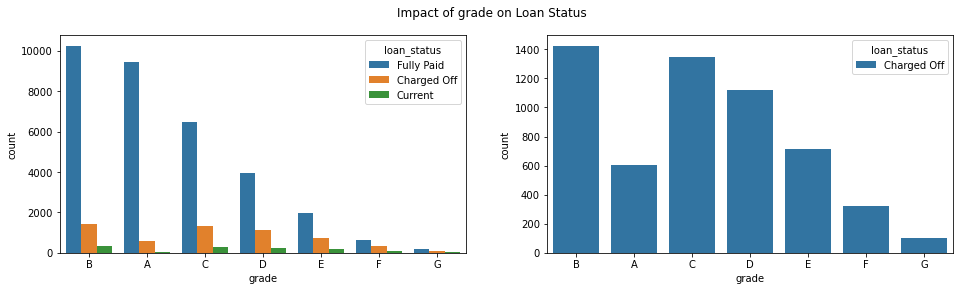

In [52]:
fig ,axes = plt.subplots(1,2, figsize = (16,4))
fig.suptitle('Impact of grade on Loan Status')
plt.subplot(1,2,1)
sns.countplot(x ='grade', hue = 'loan_status', data = df, order = df.grade.value_counts().index)
plt.subplot(1,2,2)
sns.countplot(x ='grade', hue = 'loan_status', data = df_chargeoff, order = df.grade.value_counts().index)
plt.show()

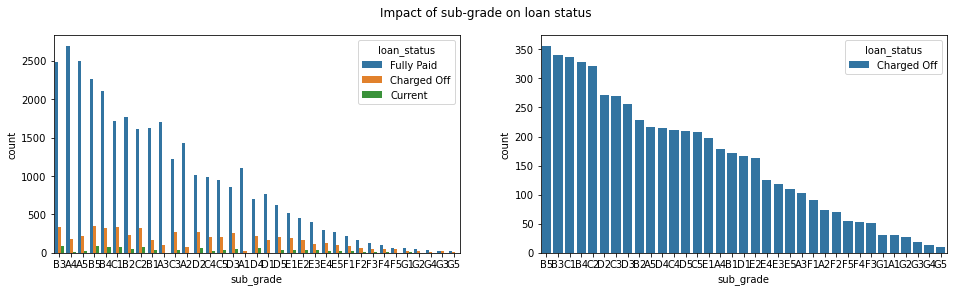

In [53]:
fig ,axes = plt.subplots(1,2, figsize = (16,4))
fig.suptitle('Impact of sub-grade on loan status')
plt.subplot(1,2,1)
sns.countplot(x ='sub_grade', hue = 'loan_status', data = df, order = df.sub_grade.value_counts().index)
plt.subplot(1,2,2)
sns.countplot(x ='sub_grade', hue = 'loan_status', data = df_chargeoff, order = df_chargeoff.sub_grade.value_counts().index)
plt.show()

#### Loan borrowers are higher for 36 months term but the loans with 60 months term has more default rate % compared to 36 months

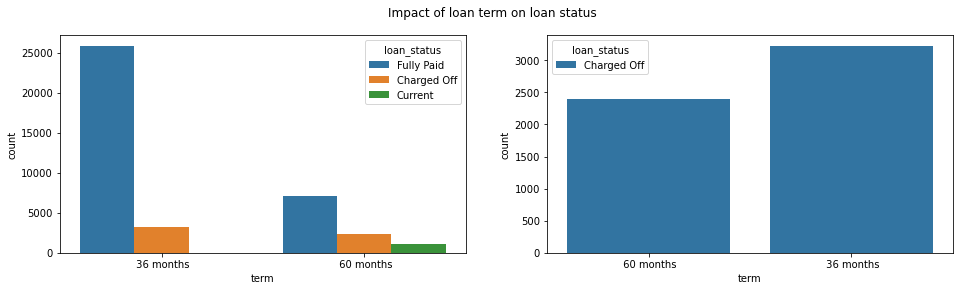

In [54]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
fig.suptitle('Impact of loan term on loan status')
plt.subplot(1,2,1)
sns.countplot(x = 'term', hue = 'loan_status', data = df)
plt.subplot(1,2,2)
sns.countplot(x = 'term', hue = 'loan_status', data = df_chargeoff)
plt.show()

In [55]:
table_term = pd.pivot_table(df,values = 'home_ownership', index = 'term', columns = 'loan_status', aggfunc = 'count')
table_term['Current'].fillna('0', inplace = True)
table_term['Current'] = table_term['Current'].apply(pd.to_numeric)
table_term['Total'] = table_term['Charged Off']+table_term['Current']+table_term['Fully Paid']
table_term['Charged_Off %'] = (table_term['Charged Off']*100) / table_term['Total']
table_term.sort_values(by = 'Charged_Off %', ascending = False)

loan_status,Charged Off,Current,Fully Paid,Total,Charged_Off %
term,,,,,
60 months,2400.0,1140.0,7081.0,10621.0,22.596742
36 months,3227.0,0.0,25869.0,29096.0,11.090872


#### Annual income has minor impact on the loan status

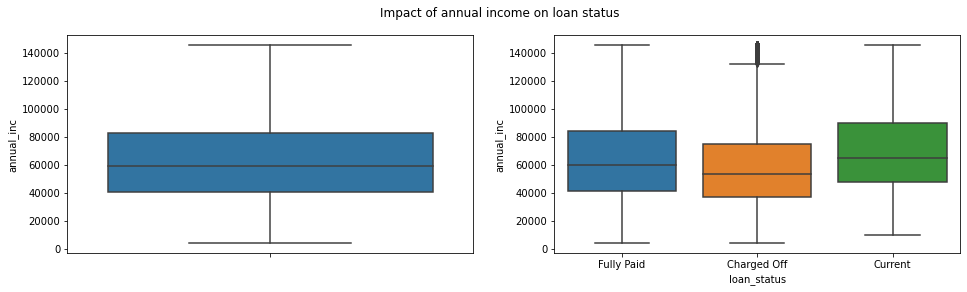

In [56]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
fig.suptitle('Impact of annual income on loan status')
plt.subplot(1,2,1)
sns.boxplot(y = 'annual_inc', data = df)
plt.subplot(1,2,2)
sns.boxplot(x='loan_status', y = 'annual_inc', data = df)
plt.show()

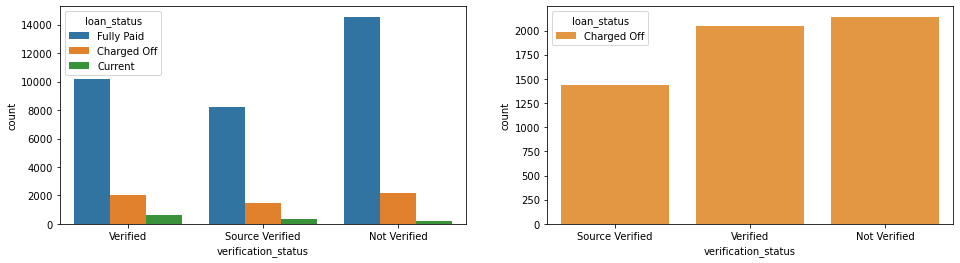

In [57]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
plt.subplot(1,2,1)
sns.countplot( x= 'verification_status', hue = 'loan_status', data = df)
plt.subplot(1,2,2)
sns.countplot(x = 'verification_status', hue = 'loan_status', data = df_chargeoff, palette="YlOrBr")
plt.show()

#### Debt_consolidation, Credit card are the top purpose for the application of loan. But default rate is higher in the loans applied for small business, renewable energy and education

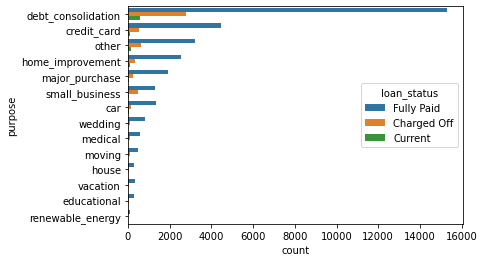

In [58]:
sns.countplot( y= 'purpose', hue = 'loan_status', data = df, order = df.purpose.value_counts().index)
plt.show()

In [59]:
table_purpose = pd.pivot_table(df, values = 'loan_amnt', index = 'purpose', columns = 'loan_status', aggfunc = 'count')
table_purpose['Current'].fillna('0', inplace = True)
table_purpose['Current'] = table_purpose['Current'].apply(pd.to_numeric)
table_purpose['Total'] = table_purpose['Charged Off'] + table_purpose['Current'] + table_purpose['Fully Paid']
table_purpose['charged_off %'] = (table_purpose['Charged Off']*100) / table_purpose['Total']
np.round(table_purpose,decimals = 2)
table_purpose.sort_values( by = 'charged_off %', ascending = False)

loan_status,Charged Off,Current,Fully Paid,Total,charged_off %
purpose,,,,,
small_business,475.0,74.0,1279.0,1828.0,25.984683
renewable_energy,19.0,1.0,83.0,103.0,18.446602
educational,56.0,0.0,269.0,325.0,17.230769
other,633.0,128.0,3232.0,3993.0,15.852742
moving,92.0,7.0,484.0,583.0,15.780446
house,59.0,14.0,308.0,381.0,15.485564
medical,106.0,12.0,575.0,693.0,15.295815
debt_consolidation,2767.0,586.0,15288.0,18641.0,14.843624
vacation,53.0,6.0,322.0,381.0,13.910761


#### Loan amount, loan amount funded, loan amount invested, installment, total payment, total payment investor, total received principal are strongly correlated 

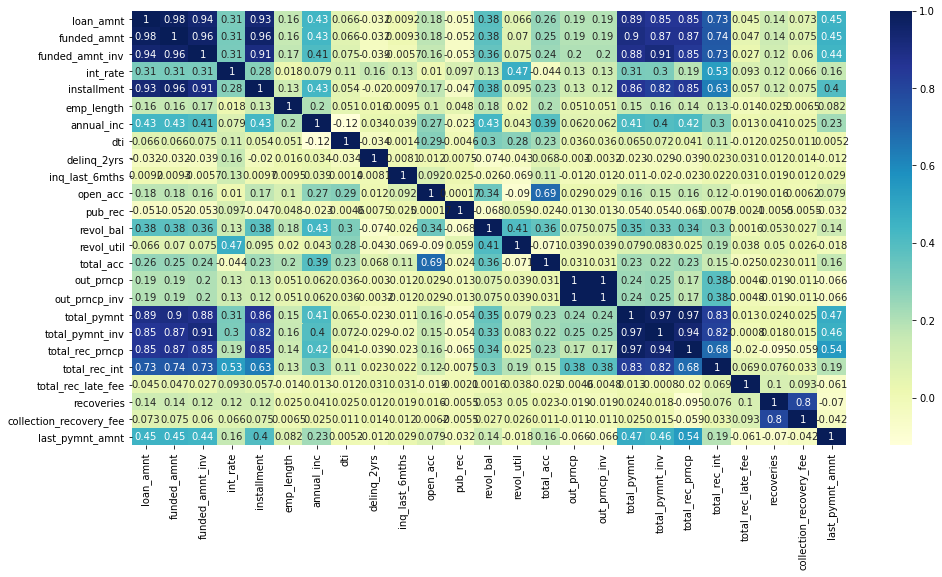

In [60]:
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

#### Installment & debt to Income ratio has no major impact on loan status

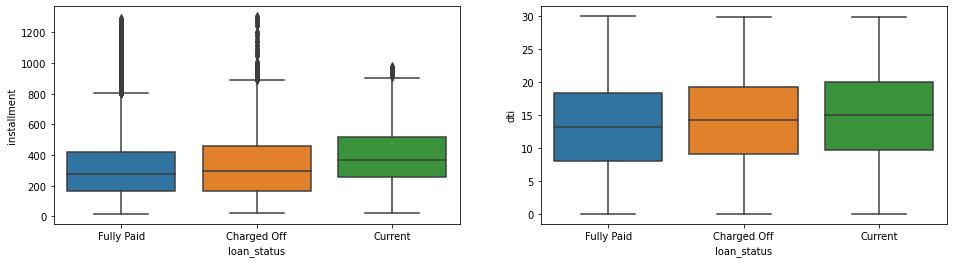

In [77]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
plt.subplot(1,2,1)
sns.boxplot(x='loan_status', y = 'installment', data = df)
plt.subplot(1,2,2)
sns.boxplot(x='loan_status', y = 'dti', data = df)
plt.show()

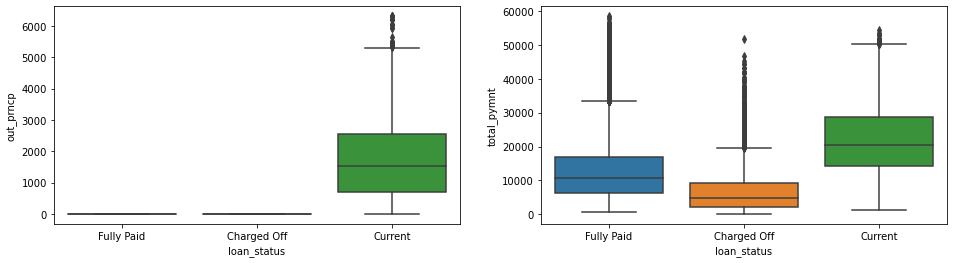

In [78]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
plt.subplot(1,2,1)
sns.boxplot(x='loan_status', y = 'out_prncp', data = df)
plt.subplot(1,2,2)
sns.boxplot(x='loan_status', y = 'total_pymnt', data = df)
plt.show()

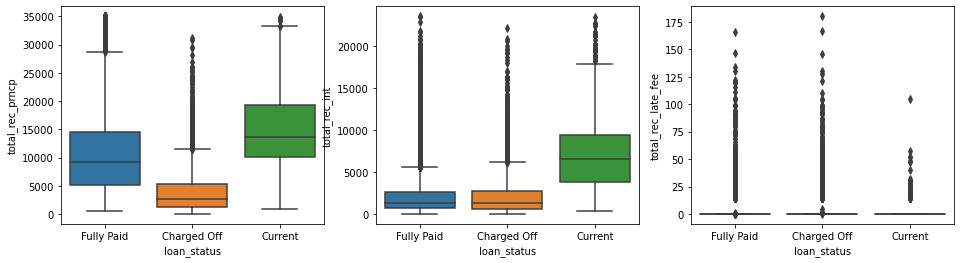

In [62]:
fig, axes = plt.subplots(1,3, figsize = (16,4))
plt.subplot(1,3,1)
sns.boxplot(x='loan_status', y = 'total_rec_prncp', data = df)
plt.subplot(1,3,2)
sns.boxplot(x='loan_status', y = 'total_rec_int', data = df)
plt.subplot(1,3,3)
sns.boxplot(x='loan_status', y = 'total_rec_late_fee', data = df)
plt.show()

#### No. of open accounts, No. of open credit line  and No. of inquiries in last 6 month has no effect on loan status

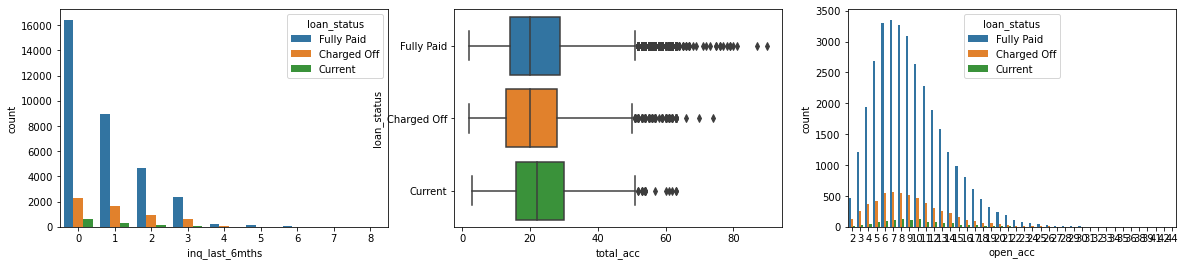

In [63]:
fig, axes = plt.subplots(1,3, figsize = (20,4))
plt.subplot(1,3,1)
sns.countplot(x = 'inq_last_6mths', hue = 'loan_status', data = df)
plt.subplot(1,3,2)
sns.boxplot(x = 'total_acc', y = 'loan_status', data = df)
plt.subplot(1,3,3)
sns.countplot(x = 'open_acc', hue = 'loan_status', data = df)
plt.show()

#### Revolving line utilisation rate is higher for defaulted borrowers compared to fully paid

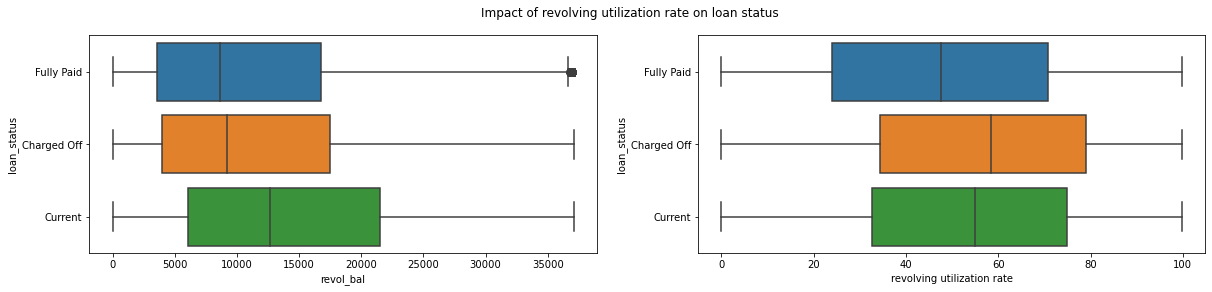

In [64]:
fig, axes = plt.subplots(1,2, figsize = (20,4))
fig.suptitle('Impact of revolving utilization rate on loan status')
plt.subplot(1,2,1)
sns.boxplot(x = 'revol_bal', y = 'loan_status', data = df)
plt.subplot(1,2,2)
plt.xlabel("revolving balance")
sns.boxplot(x = 'revol_util', y = 'loan_status', data = df)
plt.xlabel("revolving utilization rate")
plt.show()

#### Maximum number of loans are in 2011 and trend is increasing since 2007.

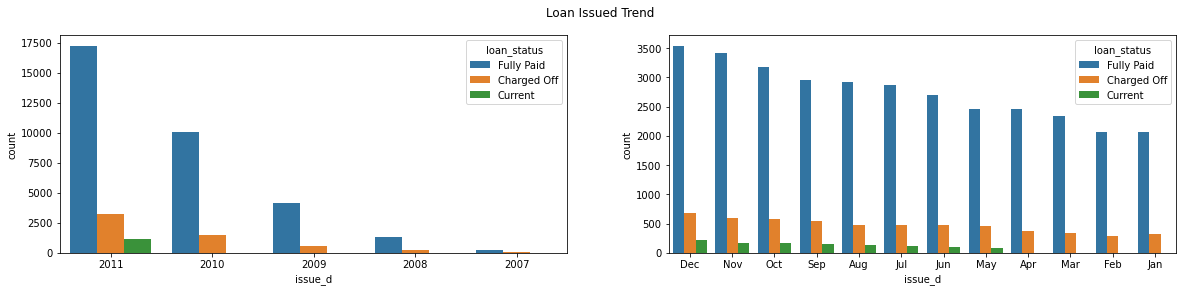

In [65]:
fig, axes = plt.subplots(1,2, figsize = (20,4))
fig.suptitle('Loan Issued Trend')
plt.subplot(1,2,1)
ax = sns.countplot(x = df.issue_year, hue = df.loan_status)
plt.subplot(1,2,2)
ax = sns.countplot(x = df.issue_month, hue = df.loan_status)
plt.show()

### Segmented Analysis

#### Annual Income is segmented and there is no major impact from annual_income against the charge offs

In [66]:
def income_seg(x):
    if int(x) < float('20000'):
        return "0-20K"
    elif int(x) < float('40000'):
        return "20-40K"
    elif int(x) < float('60000'):
        return "40K-60K"
    elif int(x) < float('80000'):
        return "60-80K"
    elif int(x) < float('100000'):
        return "80K-100K"
    else:
        return ">100K"

In [67]:
df.income_segment = df.annual_inc.apply(lambda x: income_seg(x))

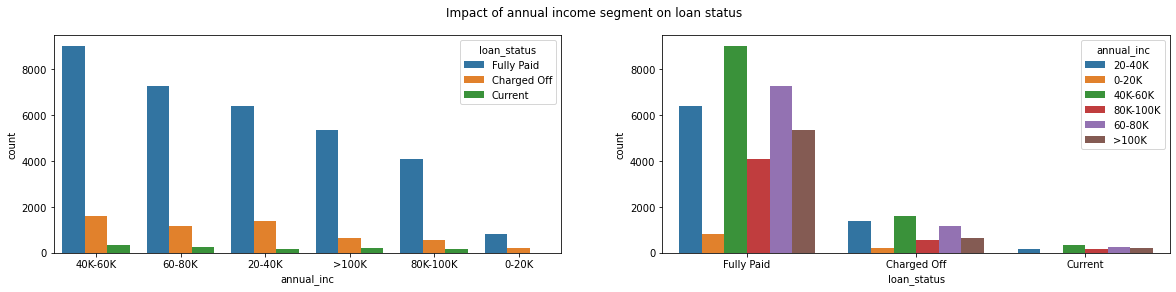

In [68]:
fig, axes = plt.subplots(1,2, figsize = (20,4))
fig.suptitle('Impact of annual income segment on loan status')
plt.subplot(1,2,1)
ax = sns.countplot(x = df.income_segment, hue = df.loan_status, order = df.income_segment.value_counts().index)
plt.subplot(1,2,2)
ax = sns.countplot(x = df.loan_status, hue = df.income_segment)
plt.show()

####  The loans with interest rate 11 -20% have higher default rate compare to the loans with interest rate <=10%

In [69]:
def int_seg(x):
    if int(x) <= float('10'):
        return "0-10%"
    elif int(x) <= float('20'):
        return "11-20%"
    elif int(x) <= float('30'):
        return "21-30%"
    else:
        return ">30%"

In [70]:
df.int_segment = df.int_rate.apply(lambda x: int_seg(x))

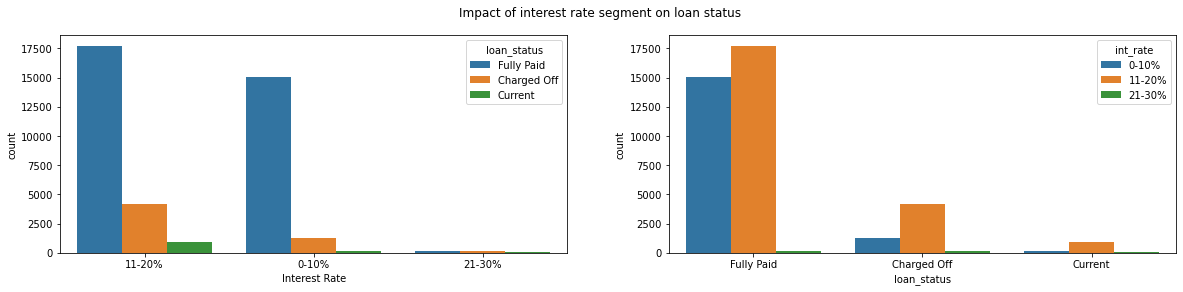

In [71]:
fig, axes = plt.subplots(1,2, figsize = (20,4))
fig.suptitle('Impact of interest rate segment on loan status')
plt.subplot(1,2,1)
ax = sns.countplot(x = df.int_segment, hue = df.loan_status, order = df.int_segment.value_counts().index)
plt.xlabel("Interest Rate")
plt.subplot(1,2,2)
ax = sns.countplot(x = df.loan_status, hue = df.int_segment)
plt.show()

####  Most of borrowers apply for loans less than 10K. Considering default rate, borrowers with loan amount >10K tend to default marginally more than the borrowers with loan amount <10K 

In [72]:
def loan_seg(x):
    if int(x) <= float('10000'):
        return "0-10K"
    else:
        return ">10K"

In [73]:
df.loan_segment = df.loan_amnt.apply(lambda x: loan_seg(x))

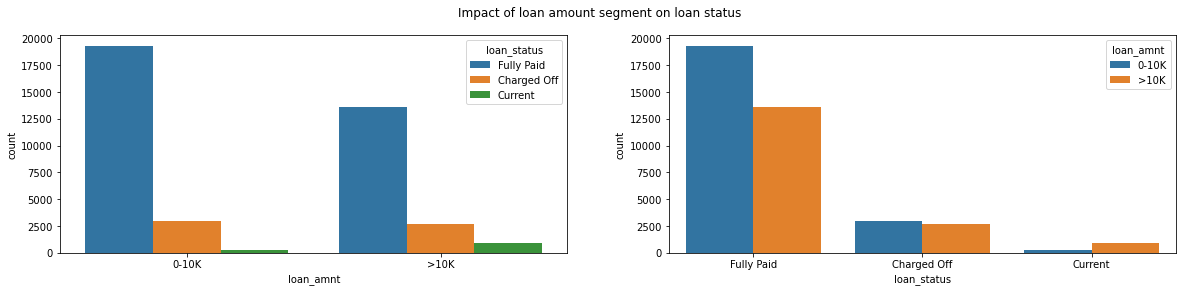

In [74]:
fig, axes = plt.subplots(1,2, figsize = (20,4))
fig.suptitle('Impact of loan amount segment on loan status')
plt.subplot(1,2,1)
ax = sns.countplot(x = df.loan_segment, hue = df.loan_status, order = df.loan_segment.value_counts().index)
plt.subplot(1,2,2)
ax = sns.countplot(x = df.loan_status, hue = df.loan_segment)
plt.show()

In [76]:
df.shape

(39717, 39)